In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#face_cascade = cv2.CascadeClassifier('C:\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('C:\opencv\build\etc\haarcascades\haarcascade_eye.xml')

In [26]:
img = cv2.imread('james.jpg')
helena = cv2.imread('helena.png')
james = img.copy()
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

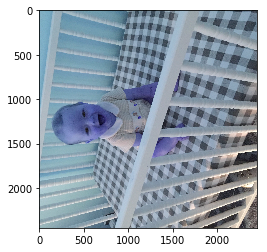

In [4]:
plt.imshow(img)

In [5]:
#faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [6]:
'''
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
cv2.imshow('img', img)
cv2.waitKey(0)
'''

"\nfor (x,y,w,h) in faces:\n    img = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)\n    roi_gray = gray[y:y+h, x:x+w]\n    roi_color = img[y:y+h, x:x+w]\n    eyes = eye_cascade.detectMultiScale(roi_gray)\n    for (ex,ey,ew,eh) in eyes:\n        cv2.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh),(0,255,0),2)\n        \ncv2.imshow('img', img)\ncv2.waitKey(0)\n"

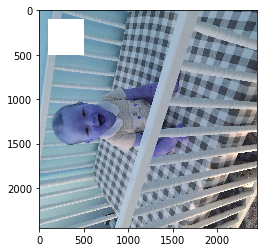

In [7]:
img2 = img.copy()
img2[100:500,100:500] = [255,255,255]
plt.imshow(img2)

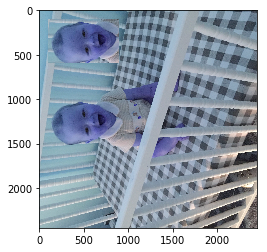

In [8]:
img2 = img.copy()
face = img2[1000:1500,100:900]
img2[100:600,100:900] = face
plt.imshow(img2)

In [29]:
def rotate(img):
    rows, cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),270,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

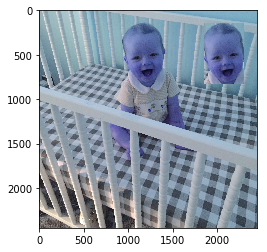

In [10]:
img2 = dst.copy()
face = img2[150:830,950:1400]
img2[150:830,1850:2300] = face
plt.imshow(img2)

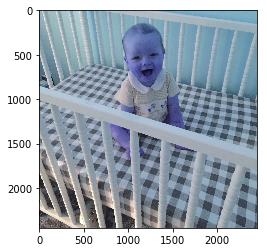

In [11]:
img = dst.copy()
plt.imshow(img)

In [12]:
b,g,r = cv2.split(img)

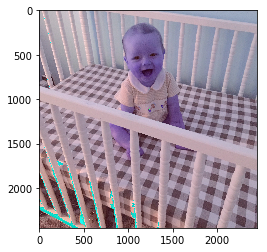

In [13]:
b,g,r = cv2.split(img)
b += 30
r -= 5
g -= 5
img2 = cv2.merge((b,g,r))
plt.imshow(img2)

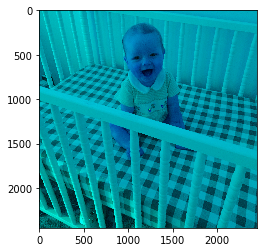

In [14]:
img2[:,:,0] = 0
plt.imshow(img2)

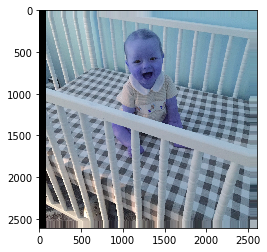

In [20]:
replicate = cv2.copyMakeBorder(img,80,80,80,80,cv2.BORDER_REPLICATE)
plt.imshow(replicate,'gray')

In [24]:
x = np.uint8([250])
y = np.uint8([10])
cv2.add(x,y)

array([[255]], dtype=uint8)

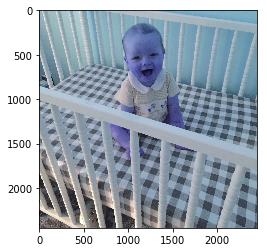

In [30]:
james = rotate(james)
plt.imshow(james)

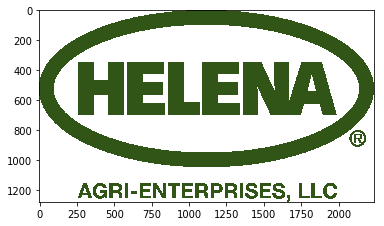

In [31]:
plt.imshow(helena)

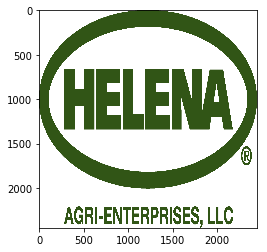

In [39]:
width = james.shape[1]
height = james.shape[0]
dim = (width, height)
dim
resized_helena = cv2.resize(helena, dim)
plt.imshow(resized_helena)

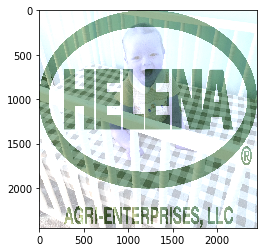

In [42]:
combined = cv2.addWeighted(james,0.7,resized_helena,0.6,0)
plt.imshow(combined)

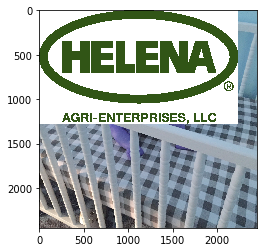

In [71]:
# put logo in top right corner
rows, cols, channels = helena.shape
roi = helena[0:rows,0:cols]

# create mask and create its inverse
helena_gray = cv2.cvtColor(helena,cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(helena_gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# black out logo
helena_black = cv2.bitwise_and(roi,roi,mask = mask_inv)

# take region of logo from logo
helena_region = cv2.bitwise_and(helena, helena, mask = mask)

#put logo in roi and modify main image
dst = cv2.add(helena_black, helena_region)
james[0:rows, 0:cols] = dst

plt.imshow(james)